In [1]:
pip install tensorflow opencv-python matplotlib



  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.6/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.2/38.6 MB 9.6 MB/s eta 0:00:04
   - -------------------------------------- 1.7/38.6 MB 9.8 MB/s eta 0:00:04
   -- ------------------------------------- 2.5/38.6 MB 11.4 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/38.6 MB 10.7 MB/s eta 0:00:04
   --- ------------------------------------ 3.5/38.6 MB 11.1 MB/s eta 0:00:04
   --- ------------------------------------ 3.9/38.6 MB 10.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.6 MB 10.9 MB/s eta 0:00:04
   ----- -

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_images_and_labels(base_folder):
    animal_types = ['buffalo', 'elephant', 'rhino', 'zebra']
    images = {animal: [] for animal in animal_types}
    labels = {animal: [] for animal in animal_types}
    categories = []                                                     # added 
    for animal in animal_types:
        animal_folder = os.path.join(base_folder, animal)
        for filename in os.listdir(animal_folder):
            if filename.endswith('.jpg'):
                path = os.path.join(animal_folder, filename)
                image = cv2.imread(path)
                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    label_file = filename.replace('.jpg', '.txt')
                    label_path = os.path.join(animal_folder, label_file)

                    with open(label_path, 'r') as file:
                        boxes = file.readlines()

                    images[animal].append(image)
                    labels[animal].append(boxes)
                    categories.append(animal)
    return images, labels, categories


In [2]:
# Load and plot images
base_dir = "C:\\Users\\DELL\\OneDrive\\Desktop\\Hamoye\\Premiere project_data"
images, labels, categories = load_images_and_labels(base_dir)

In [3]:

def show_image_with_boxes(image, boxes, category, ax):
    ax.imshow(image)
    for box in boxes:
        parts = box.strip().split()
        x_center, y_center, width, height = float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])
        x = (x_center - width / 2) * image.shape[1]
        y = (y_center - height / 2) * image.shape[0]
        rect = patches.Rectangle((x, y), width * image.shape[1], height * image.shape[0], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    ax.set_title(category)
    ax.axis('off')

In [4]:
def plot_category_images(images, labels):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 5))
    if len(axs) != len(images):
        axs = [axs]  # in case there's only one category plotted, matplotlib doesn't return an array of axes
    for ax, (category, imgs) in zip(axs, images.items()):
        show_image_with_boxes(imgs[0], labels[category][0], category, ax)
    plt.show()

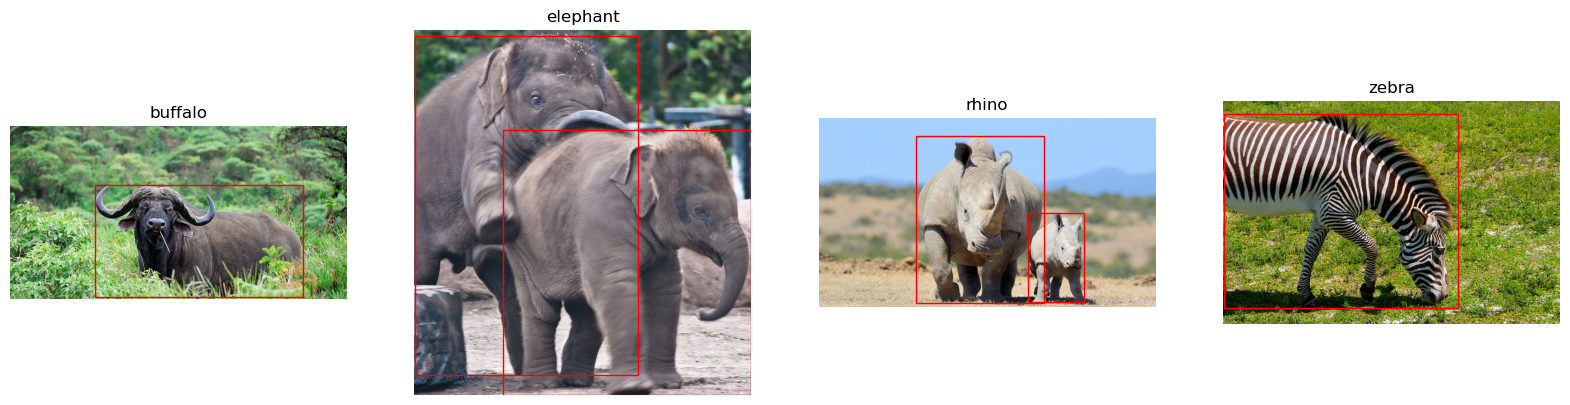

In [5]:
plot_category_images(images, labels)


In [6]:
print("Total images loaded:", len(images))
print("Category distribution:")
for category in set(categories):
    print(f"{category}: {categories.count(category)}")


Total images loaded: 4
Category distribution:
buffalo: 375
rhino: 375
elephant: 375
zebra: 376


In [ ]:
#### EDA

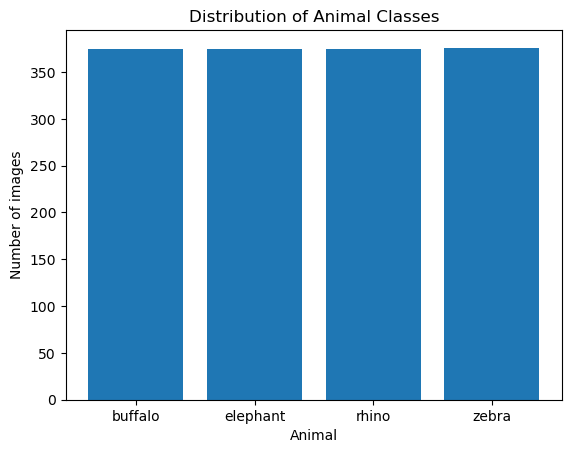

In [7]:
import matplotlib.pyplot as plt

def plot_class_distribution(categories):
    class_counts = {}
    for category in categories:
        if category in class_counts:
            class_counts[category] += 1
        else:
            class_counts[category] = 1

    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Animal')
    plt.ylabel('Number of images')
    plt.title('Distribution of Animal Classes')
    plt.show()

# Assuming images, labels, and categories are loaded from the modified load_images_and_labels function
base_dir = "C:\\Users\\DELL\\OneDrive\\Desktop\\Hamoye\\Premiere project_data"
#images, labels, categories = load_images_and_labels(base_dir)
plot_class_distribution(categories)


In [9]:
import os
import cv2

def load_images_and_labels(base_folder):
    animal_types = ['buffalo', 'elephant', 'rhino', 'zebra']
    images = []
    labels = []
    categories = []

    for animal in animal_types:
        animal_folder = os.path.join(base_folder, animal)
        for filename in os.listdir(animal_folder):
            if filename.endswith('.jpg'):
                image_path = os.path.join(animal_folder, filename)
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Error loading image from {image_path}")
                    continue  # Skip this image
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                label_path = os.path.join(animal_folder, filename.replace('.jpg', '.txt'))
                with open(label_path, 'r') as file:
                    boxes = file.readlines()

                images.append(image)
                labels.append(boxes)
                categories.append(animal)

    return images, labels, categories


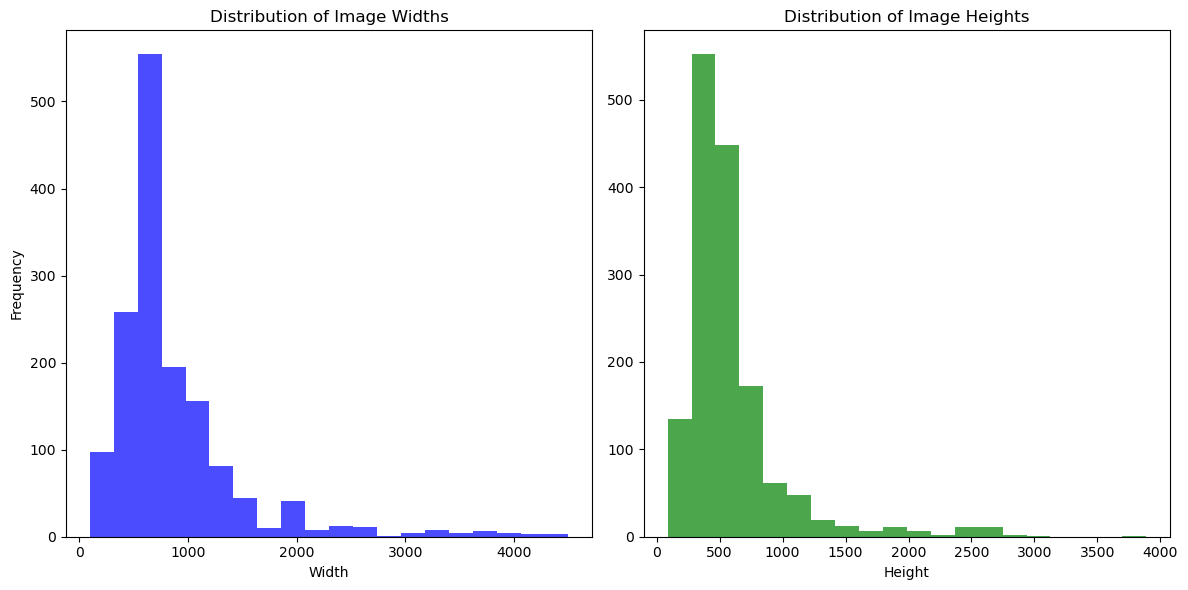

In [10]:
def plot_image_dimensions(images):
    widths = [img.shape[1] for img in images]
    heights = [img.shape[0] for img in images]

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(122)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height')
    
    plt.tight_layout()
    plt.show()

# Load the images and labels
base_dir = "C:\\Users\\DELL\\OneDrive\\Desktop\\Hamoye\\Premiere project_data"
images, labels, categories = load_images_and_labels(base_dir)

# Plot dimensions
plot_image_dimensions(images)


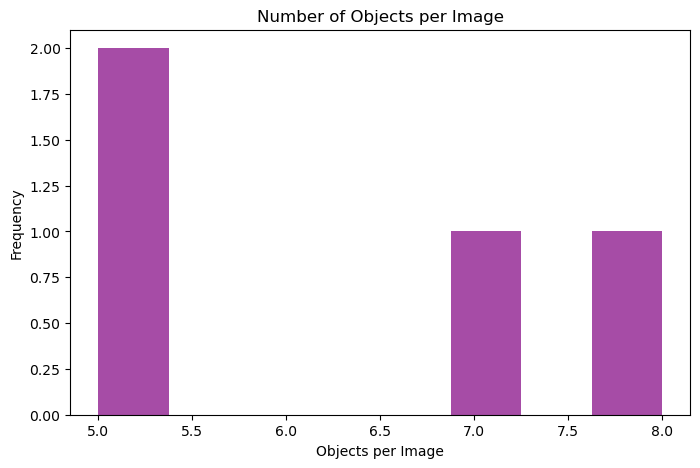

In [15]:
def plot_objects_per_image(labels):
    num_objects = [len(label) for label in labels]

    plt.figure(figsize=(8, 5))
    plt.hist(num_objects, bins=max(num_objects), color='purple', alpha=0.7)
    plt.title('Number of Objects per Image')
    plt.xlabel('Objects per Image')
    plt.ylabel('Frequency')
    plt.show()

# Assuming labels are loaded
plot_objects_per_image(labels)


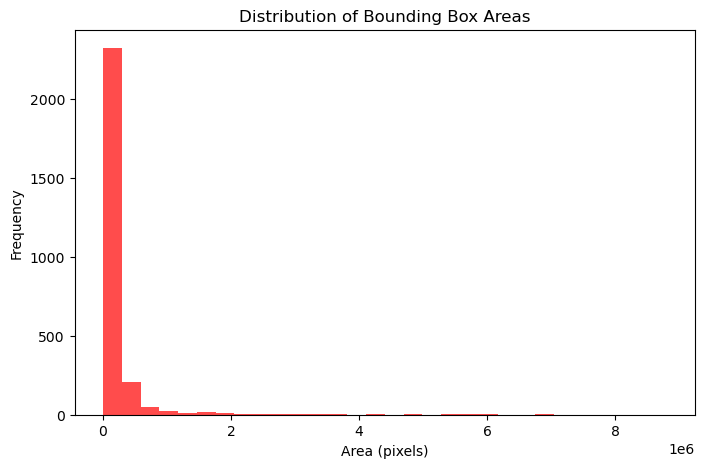

In [26]:
def plot_bbox_sizes(labels, images):
    bbox_areas = []
    for label, image in zip(labels, images):
        for box in label:
            parts = box.strip().split()
            _, x, y, w, h = map(float, parts)
            width_pixels = w * image.shape[1]
            height_pixels = h * image.shape[0]
            bbox_areas.append(width_pixels * height_pixels)

    plt.figure(figsize=(8, 5))
    plt.hist(bbox_areas, bins=30, color='red', alpha=0.7)
    plt.title('Distribution of Bounding Box Areas')
    plt.xlabel('Area (pixels)')
    plt.ylabel('Frequency')
    plt.show()


plot_bbox_sizes(labels, images)


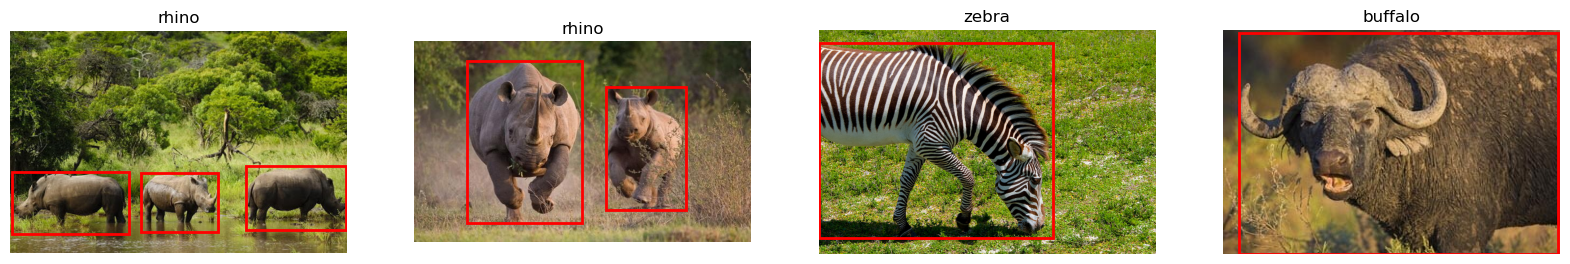

In [29]:
import random
def visualize_annotations(images, labels, categories, num_samples=4):
    indices = random.sample(range(len(images)), num_samples)
    fig, axs = plt.subplots(1, num_samples, figsize=(20, 5))

    for i, idx in enumerate(indices):
        image = images[idx]
        label = labels[idx]
        category = categories[idx]
        ax = axs[i]
        ax.imshow(image)
        for box in label:
            parts = box.strip().split()
            x_center, y_center, width, height = map(float, parts[1:])
            x = (x_center - width / 2) * image.shape[1]
            y = (y_center - height / 2) * image.shape[0]
            rect = patches.Rectangle((x, y), width * image.shape[1], height * image.shape[0], linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        ax.set_title(category)
        ax.axis('off')
    plt.show()


visualize_annotations(images, labels, categories, num_samples=4)
